<a href="https://colab.research.google.com/github/sumitsontakke/deep_learning/blob/main/CNN/a1_ciphar10_tuned.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load and preprocess CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize pixel values to [0, 1]
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Convert labels to categorical if needed (optional)
# y_train = to_categorical(y_train, 10)
# y_test = to_categorical(y_test, 10)

# Define CNN model
def build_cnn():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Dropout(0.25),

        Conv2D(64, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Dropout(0.25),

        Conv2D(128, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Dropout(0.4),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Build model
model = build_cnn()

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_cifar10_cnn.h5", save_best_only=True) # Without this, the model would be saved at the end of every epoch, even if performance worsens.



# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=64,
    callbacks=[early_stop, checkpoint],
    verbose=2
)

# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\n✅ Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30


625/625 - 14s - 23ms/step - accuracy: 0.3763 - loss: 1.7325 - val_accuracy: 0.4680 - val_loss: 1.5364
Epoch 2/30


625/625 - 3s - 5ms/step - accuracy: 0.5036 - loss: 1.3777 - val_accuracy: 0.5891 - val_loss: 1.1523
Epoch 3/30
625/625 - 3s - 5ms/step - accuracy: 0.5621 - loss: 1.2251 - val_accuracy: 0.5020 - val_loss: 1.5330
Epoch 4/30


625/625 - 6s - 9ms/step - accuracy: 0.6033 - loss: 1.1200 - val_accuracy: 0.6070 - val_loss: 1.1204
Epoch 5/30


625/625 - 3s - 5ms/step - accuracy: 0.6348 - loss: 1.0383 - val_accuracy: 0.6383 - val_loss: 1.0284
Epoch 6/30


625/625 - 3s - 5ms/step - accuracy: 0.6575 - loss: 0.9776 - val_accuracy: 0.6709 - val_loss: 0.9479
Epoch 7/30


625/625 - 3s - 6ms/step - accuracy: 0.6712 - loss: 0.9387 - val_accuracy: 0.6956 - val_loss: 0.8858
Epoch 8/30
625/625 - 5s - 7ms/step - accuracy: 0.6901 - loss: 0.8938 - val_accuracy: 0.6813 - val_loss: 0.9241
Epoch 9/30


625/625 - 3s - 5ms/step - accuracy: 0.6985 - loss: 0.8653 - val_accuracy: 0.7386 - val_loss: 0.7759
Epoch 10/30
625/625 - 3s - 5ms/step - accuracy: 0.7096 - loss: 0.8324 - val_accuracy: 0.7125 - val_loss: 0.8421
Epoch 11/30
625/625 - 5s - 8ms/step - accuracy: 0.7164 - loss: 0.8105 - val_accuracy: 0.6892 - val_loss: 0.9389
Epoch 12/30
625/625 - 5s - 8ms/step - accuracy: 0.7229 - loss: 0.7867 - val_accuracy: 0.7312 - val_loss: 0.7945
Epoch 13/30


625/625 - 4s - 6ms/step - accuracy: 0.7322 - loss: 0.7656 - val_accuracy: 0.7660 - val_loss: 0.6661
Epoch 14/30
625/625 - 3s - 5ms/step - accuracy: 0.7382 - loss: 0.7418 - val_accuracy: 0.7637 - val_loss: 0.6831
Epoch 15/30
625/625 - 3s - 5ms/step - accuracy: 0.7464 - loss: 0.7261 - val_accuracy: 0.7515 - val_loss: 0.7373
Epoch 16/30
625/625 - 5s - 8ms/step - accuracy: 0.7534 - loss: 0.7123 - val_accuracy: 0.7447 - val_loss: 0.7251
Epoch 17/30


625/625 - 3s - 5ms/step - accuracy: 0.7549 - loss: 0.7043 - val_accuracy: 0.7745 - val_loss: 0.6659
Epoch 18/30


625/625 - 3s - 5ms/step - accuracy: 0.7602 - loss: 0.6843 - val_accuracy: 0.7771 - val_loss: 0.6491
Epoch 19/30


625/625 - 3s - 5ms/step - accuracy: 0.7653 - loss: 0.6729 - val_accuracy: 0.7838 - val_loss: 0.6455
Epoch 20/30
625/625 - 5s - 8ms/step - accuracy: 0.7688 - loss: 0.6589 - val_accuracy: 0.7311 - val_loss: 0.7878
Epoch 21/30
625/625 - 5s - 8ms/step - accuracy: 0.7739 - loss: 0.6419 - val_accuracy: 0.7822 - val_loss: 0.6511
Epoch 22/30
625/625 - 4s - 6ms/step - accuracy: 0.7786 - loss: 0.6314 - val_accuracy: 0.7423 - val_loss: 0.7892
Epoch 23/30


625/625 - 5s - 8ms/step - accuracy: 0.7787 - loss: 0.6323 - val_accuracy: 0.7913 - val_loss: 0.6159
Epoch 24/30
625/625 - 3s - 5ms/step - accuracy: 0.7850 - loss: 0.6087 - val_accuracy: 0.7741 - val_loss: 0.6588
Epoch 25/30
625/625 - 3s - 6ms/step - accuracy: 0.7881 - loss: 0.6012 - val_accuracy: 0.7485 - val_loss: 0.7343
Epoch 26/30
625/625 - 3s - 5ms/step - accuracy: 0.7877 - loss: 0.6057 - val_accuracy: 0.7766 - val_loss: 0.6572
Epoch 27/30
625/625 - 5s - 9ms/step - accuracy: 0.8002 - loss: 0.5777 - val_accuracy: 0.7792 - val_loss: 0.6552
Epoch 28/30
625/625 - 3s - 6ms/step - accuracy: 0.7949 - loss: 0.5834 - val_accuracy: 0.7674 - val_loss: 0.7242
313/313 - 1s - 4ms/step - accuracy: 0.7816 - loss: 0.6333

✅ Test Accuracy: 0.7816, Test Loss: 0.6333


📈 Plot training vs. validation accuracy/loss



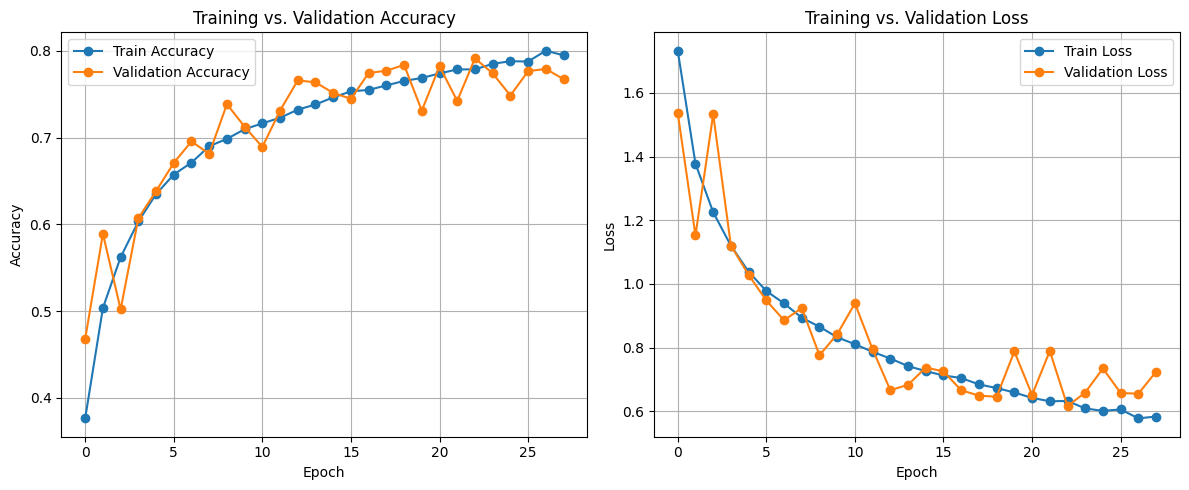

In [2]:
import matplotlib.pyplot as plt

# Accuracy Plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training vs. Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### 💡 **What to look for:**

- 📈 If **validation loss increases** while training loss decreases → Overfitting
- 🟢 If both training and validation metrics improve together → Model is learning well
- 📉 If both stay flat → Model may be underfitting or need better tuning (learning rate, architecture, etc.)

---


📊 Evaluate and plot a confusion matrix




In [3]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")


Test Accuracy: 0.7816
Test Loss: 0.6333


📊 Step 2: Generate predictions & convert them to class labels

In [4]:
import numpy as np

# Predict probabilities
y_pred_probs = model.predict(X_test)

# Convert probabilities to class labels using argmax
y_pred_classes = np.argmax(y_pred_probs, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


🧾 Step 3: Confusion Matrix

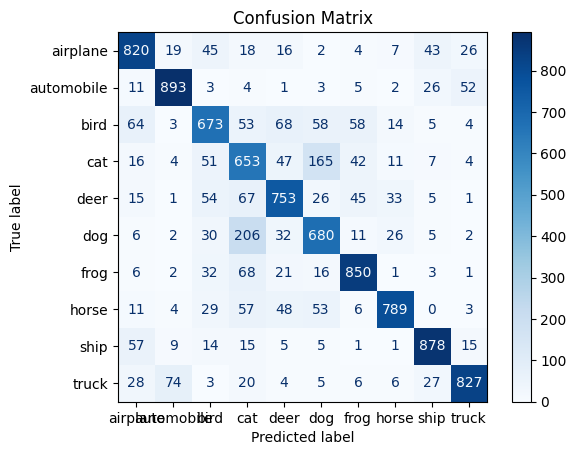

In [5]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()



Term | Description | Example from matrix
--- | --- | ---
TP (True Positive) | Model correctly predicts the actual class | 873 airplanes predicted correctly
FP (False Positive) | Model incorrectly predicts this class | 40 ships predicted as airplanes
FN (False Negative) | Actual class missed by model | 124 birds predicted as airplanes
TN (True Negative) | Model correctly identifies non-class items | All other correct rejections

🕵️ Insights from Your Matrix
Strong Classes:

frog (TP = 846), automobile (894), and ship (843) are very accurately predicted → model is strong here.

Confused Classes:

cat and dog are often confused with each other (common in real-world due to visual similarity).

bird is misclassified as airplane or deer, likely due to visual features in images.

### ✅ Classification Report

In [6]:
from sklearn.metrics import classification_report

# Print classification report
print(classification_report(y_test, y_pred_classes, target_names=class_names))


              precision    recall  f1-score   support

    airplane       0.79      0.82      0.81      1000
  automobile       0.88      0.89      0.89      1000
        bird       0.72      0.67      0.70      1000
         cat       0.56      0.65      0.60      1000
        deer       0.76      0.75      0.75      1000
         dog       0.67      0.68      0.68      1000
        frog       0.83      0.85      0.84      1000
       horse       0.89      0.79      0.83      1000
        ship       0.88      0.88      0.88      1000
       truck       0.88      0.83      0.85      1000

    accuracy                           0.78     10000
   macro avg       0.79      0.78      0.78     10000
weighted avg       0.79      0.78      0.78     10000



Metric | What it Tells You | Usefulness
--- | --- | ---
Precision | Out of all predicted for a class, how many were correct? | High precision = low false positives. Useful when false positives are costly.
Recall | Out of all actual items of a class, how many did we catch? | High recall = low false negatives. Useful when missing a positive case is risky.
F1-Score | Harmonic mean of precision and recall | Balances both; useful when data is imbalanced.
Support | Number of actual instances of each class | Shows how many test examples belong to that class.
Accuracy | Overall ratio of correctly predicted items | Good general metric, but not enough for imbalanced data.
Macro Avg | Average of metrics treating all classes equally | Ignores class imbalance. Good to compare per-class performance.
Weighted Avg | Average of metrics weighted by support | Reflects class imbalance, better summary than macro in real-world use.

🔍 Use KerasTuner to tune CNN hyperparameters

In [7]:
! pip install keras-tuner
import keras
from keras import layers
from keras.models import Sequential
from keras.optimizers import Adam
from keras.datasets import cifar10
import keras_tuner as kt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.7 MB/s eta 0:00:00


**Define the Model-building Function**: This function will build the CNN model based on hyperparameters passed by KerasTuner. You can define hyperparameters for the number of convolutional layers, filter sizes, kernel sizes, dropout rates, etc.

In [8]:
def build_model(hp):
    model = Sequential()

    # Define Conv2D layers with hyperparameter tuning for filters, kernel size, and activation
    model.add(layers.Conv2D(
        hp.Int('filters', min_value=32, max_value=128, step=32),
        kernel_size=hp.Choice('kernel_size', values=[3, 5]),
        activation='relu',
        input_shape=(32, 32, 3)
    ))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Optionally add another convolutional block
    model.add(layers.Conv2D(
        hp.Int('filters_2', min_value=64, max_value=256, step=64),
        kernel_size=hp.Choice('kernel_size_2', values=[3, 5]),
        activation='relu'
    ))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output and add dense layers
    model.add(layers.Flatten())
    model.add(layers.Dense(hp.Int('units', min_value=128, max_value=512, step=128), activation='relu'))

    # Dropout layer with hyperparameter tuning
    model.add(layers.Dropout(rate=hp.Float('dropout', min_value=0.3, max_value=0.5, step=0.1)))

    # Output layer with softmax activation
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model with a learning rate hyperparameter
    model.compile(
        optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


**Set Up KerasTuner’s Hyperband Search**: KerasTuner supports several search algorithms, such as RandomSearch, BayesianOptimization, and Hyperband. For this case, let's use Hyperband, which is efficient and fast.

In [9]:
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    hyperband_iterations=2,
    directory='my_dir',
    project_name='cifar10_cnn'
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**objective=**'val_accuracy': The tuner will optimize for validation accuracy.

**max_epochs**=10: Maximum number of epochs per trial.

**hyperband_iterations**=2: Number of iterations to explore the hyperparameters.

**directory and project_name**: Specify where to save the tuning results.

the hyperparameter search by fitting the tuner to the training data. This runs 12+ trials and keep recording best value for each of parameter.

Example:
Trial 12 Complete [00h 00m 27s]<br>
val_accuracy: 0.6438999772071838

Best val_accuracy So Far: 0.6442000269889832 <br>
Total elapsed time: 00h 06m 45s

Search: Running Trial #13

|Value             |Best Value So Far |Hyperparameter|
|--- | --- | ---|
|32                |32                |filters|
5                 |5                 |kernel_size
192               |192               |filters_2
3                 |3                 |kernel_size_2
256               |256               |units
0.4               |0.4               |dropout
0.00066389        |0.00066389        |learning_rate
4                 |2                 |tuner/epochs
2                 |0                 |tuner/initial_epoch
2                 |2                 |tuner/bracket
1                 |0                 |tuner/round
0007              |None              |tuner/trial_id

In [10]:
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))



Trial 60 Complete [00h 03m 02s]
val_accuracy: 0.7466999888420105

Best val_accuracy So Far: 0.7519999742507935
Total elapsed time: 00h 51m 03s


**Run Hyperparameter Tuning**: Now you can start the hyperparameter search by fitting the tuner to the training data:

In [11]:

best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 128)    │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 192)    │       221,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 192)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6912)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,539,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,769,546 (14.38 MB)

 Trainable params: 3,769,546 (14.38 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
best_model.save("best_CNN_cifar10_cnn.h5")


In [14]:
best_model = tuner.get_best_models(num_models=1)[0]
best_model.evaluate(X_test, y_test)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7584 - loss: 0.7282


[0.7421092987060547, 0.7519999742507935]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


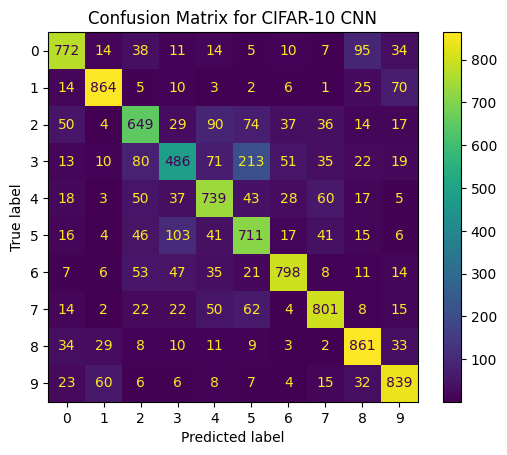

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Predict probabilities
y_pred_probs = best_model.predict(X_test)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Now use the raw y_test directly (since it's not one-hot)
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='viridis', values_format='d')
plt.title("Confusion Matrix for CIFAR-10 CNN")
plt.show()


Perfect! 🎯 Now your **confusion matrix looks great** and reflects real predictions across all CIFAR-10 classes. Here’s a quick breakdown of what it shows:

---

### 🔍 Quick Insights from the Matrix:
- **Diagonal values** (highlighted in yellow) represent correct predictions. The model is performing well across most classes!
- **Class 1 (automobile)**: Highest correct predictions with 864.
- **Class 3 (cat)** and **Class 5 (dog)** have more confusion — likely due to visual similarity.
- **Misclassifications** are mainly between semantically similar classes:
  - Cats ↔ Dogs
  - Trucks ↔ Automobiles
  - Deer ↔ Horses

---

### 🧠 Ideas to Improve Further:
If you want to squeeze more performance out of this CNN:

1. **Data Augmentation**  
   Add transformations like rotation, flips, zoom, etc.

2. **More Tuning** with KerasTuner:
   - Try `Hyperband` for speed.
   - Search wider: filters, kernel sizes, dropout rates, learning rate, batch norm.

3. **BatchNormalization** before or after activations.

4. **Use Transfer Learning** (e.g. MobileNet, VGG16 with `include_top=False`).

5. **EarlyStopping + ReduceLROnPlateau** for better learning curves.

---

Would you like help with:
- Creating a **classification report (precision, recall, F1)**?
- Adding **data augmentation** to your pipeline?
- Trying **Transfer Learning** on CIFAR-10?

Let me know and I’ll walk you through it ⚡